In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [4]:
import zipfile

with zipfile.ZipFile("archive (4).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Unzipped successfully")

Unzipped successfully


In [5]:
import os
os.listdir("dataset")

['data.csv']

In [6]:
import pandas as pd

data = pd.read_csv("dataset/data.csv", encoding="latin1")
data.head(10)


/tmp/ipython-input-2864428026.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset/data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [7]:
x = data['no2'].dropna()
x = x.values


In [8]:
len(x), x[:10]


(419509, array([17.4,  7. , 28.5, 14.7,  7.5, 25.7, 17.1,  8.7, 23. ,  8.9]))

In [9]:
r = 102303742

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

a_r, b_r


(0.1, 0.8999999999999999)

In [10]:
z = x + a_r * np.sin(b_r * x)


In [11]:
z[:10]


array([17.40479449,  7.00168139, 28.54944994, 14.761598  ,  7.54500441,
       25.60918467, 17.13126326,  8.79997125, 23.09611527,  8.99878538])

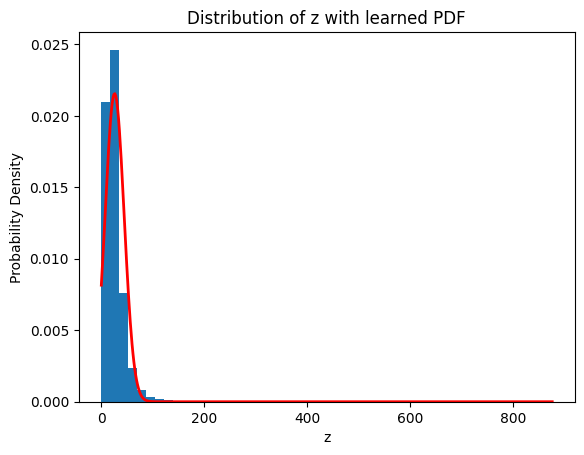

In [13]:
import matplotlib.pyplot as plt
import numpy as np

mu = np.mean(z)
variance = np.var(z)
lam = 1 / (2 * variance)
c = np.sqrt(lam / np.pi)

plt.hist(z, bins=50, density=True)

z_line = np.linspace(z.min(), z.max(), 500)
pdf = c * np.exp(-lam * (z_line - mu)**2)

plt.plot(z_line, pdf, color='red', linewidth=2)
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Distribution of z with learned PDF")
plt.show()




In [14]:
mu = np.mean(z)
mu


np.float64(25.806857082875187)

In [15]:
variance = np.var(z)
variance


np.float64(342.4820611165736)

In [16]:
lam = 1 / (2 * variance)
lam


np.float64(0.0014599304803582416)

In [17]:
c = np.sqrt(lam / np.pi)
c


np.float64(0.021557140465262983)

In [18]:
lam, mu, c


(np.float64(0.0014599304803582416),
 np.float64(25.806857082875187),
 np.float64(0.021557140465262983))